In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,signal
from scipy.optimize import curve_fit
from scipy.special import factorial

# Preparing Higgs Data
higg = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgD = pickle.load(higg)

# Preparing QCD Data
qcd = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcdD = pickle.load(qcd)


higgsMass=higgD['mass']
qcdMass=qcdD['mass']

## Intro
In this part of the lab, I will use the selection of data with a pT range of 1000-1200

## Problem 1

Below is a stacked histogram of QCD background mass and optimized mass, both log-scale and non-log-scale. This visualization will be useful when we optimize our data.

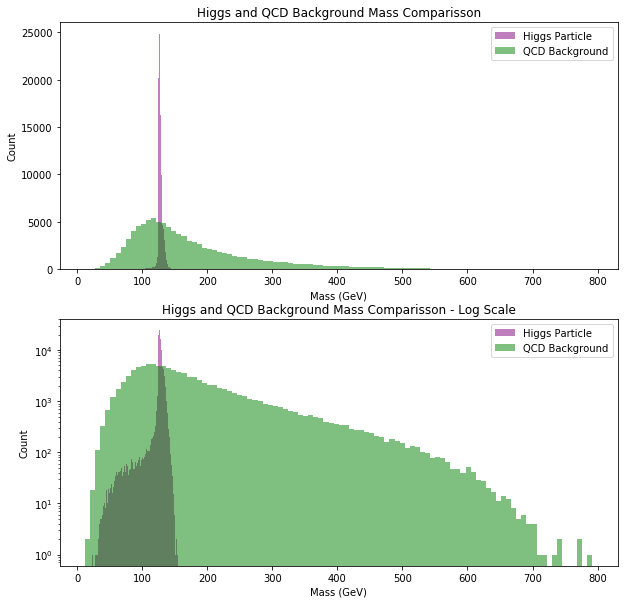

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

# Create normal-scale visualization
ax[0].hist(
    higgsMass,
    bins=100,
    color='purple',
    alpha=0.5,
    label='Higgs Particle')
ax[0].hist(
    qcdMass,
    bins=100,
    color='green',
    alpha=0.5,
    label='QCD Background')
ax[0].set_title("Higgs and QCD Background Mass Comparisson")
ax[0].legend(loc='upper right')
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Mass (GeV)")

# Create log-scale visualization
ax[1].hist(
    higgsMass,
    bins=100,
    color='purple',
    alpha=0.5,
    label='Higgs Particle')
ax[1].hist(
    qcdMass,
    bins=100,
    color='green',
    alpha=0.5,
    label='QCD Background')

# Create Graph Details
ax[1].set_yscale('log')
ax[1].legend(loc='upper right')
ax[1].set_title("Higgs and QCD Background Mass Comparisson - Log Scale")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Mass (GeV)")

plt.show()

### We Ask the Question:
What would be our expected significance without first optimizing our data (or, assuming our background is already optimized), and how does it compare to the actual significance? 

Note that the true significance is equivalent to: $\frac{N_{higgs}}{\sqrt{N_{QCD}}}$

### Assumptions
We can first make a couple of assumptions based on the above. 
1. A Poisson fit will give us a high mean. This is because the majority of the background data lies far to the right of our true signal data, and so will increase the mean. 
2. A Poisson fit will not be a good fit. We know that a Poisson distribution is Gaussian-like when $\mu$ gets large. In the above visualizations see that this is not true, because the normal-scale visualization is not Gaussian, and the log-scale visualization is not a parabola. 
3. Because of the above, I expect our significance to be larger than it should be.

### Graphing The Best Fit Line
Below we graph the best-fit Poisson distribution whose mean is the same as that of our background data: 

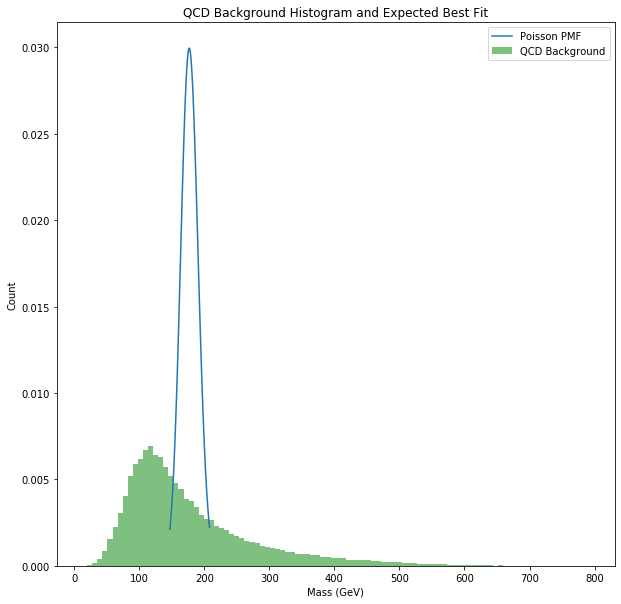

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# Make Poisson representation with the mean of our background data
qcdMu = np.mean(qcdMass)
x = np.arange(stats.poisson.ppf(0.01, mu=qcdMu),stats.poisson.ppf(0.99, mu=qcdMu))

# Prepare the best-fit distribution
ax.plot(
    x, 
    stats.poisson.pmf(x, mu=qcdMu), 
    ms=4, 
    label='Poisson PMF')

# Prepare background data
ax.hist(qcdMass,
        bins=100,
        color='green',
        alpha=0.5, 
        label='QCD Background', 
        density=True)

# Set graph details
ax.legend(loc='upper right')
ax.set_title("QCD Background Histogram and Expected Best Fit")
ax.set_ylabel("Count")
ax.set_xlabel("Mass (GeV)")

plt.show()

With the above code, we know that the mean of our background, and what should be the mean of our Poisson best-fit distribution is 177.23 (the value of the variable qcdMu).

We will now find and compare our significance to  $\frac{N_{higgs}}{\sqrt{N_{QCD}}}$

In [65]:
cdf = stats.poisson.cdf(125,mu=177)
sig = stats.norm.ppf(cdf)
signif = 50/np.sqrt(2000)
print(f"'Best-Fit' Significance: {sig}")
print(f"Actual Significance: {signif}")

'Best-Fit' Significance: -4.072729796123784
Actual Significance: 1.118033988749895


### Conclusion
There is a lot of background noise that is throwing off our answer, and Poisson is not a good way to fit this data.

Below, instead, I've found the mode of the background and rounded based on the number of bins, and got a value of 114. 

In [89]:
print(f"Mode: {stats.mode(qcdMass)}")
cdf2 = stats.poisson.cdf(125,mu=114)
sig2 = stats.norm.ppf(cdf2)
signif2 = 50/np.sqrt(2000)
print(f"'Best-Fit' Significance: {sig2}")
print(f"Actual Significance: {signif2}")

Mode: ModeResult(mode=array([11.98448462]), count=array([1]))
'Best-Fit' Significance: 1.0750588645079644
Actual Significance: 1.118033988749895


## Problem 2

### We Ask the Question:
What threshold values would best optimize our background so that we can keep the maximum good data and also the minimum background data. 

### Method Moving Forward
We will use $\frac{N_{higgs}}{\sqrt{N_{QCD}}}$ to test our thresholds. 



### see lab3 problem 1
For-loop and find ratio while making cuts. If ratio goes up/down, you've gone too far

## Problem 3
Part a: do what we did in lab 5

Part b: keep values of everything with the mass that we want to keep

## Problem 4

## Problem 5